In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import os
import sunpy.map
import aiapy
from aiapy.calibrate.prep import register as aiaprep  # sunpy.instr.aia.aiaprep was moved to aiapy
from sunpy.net import Fido, attrs as a
from astropy import units as u
import datetime
import glob
plt.rcParams.update({'figure.autolayout': True})
from matplotlib.ticker import MaxNLocator
from aiapy.calibrate import update_pointing
from sunpy.physics.differential_rotation import solar_rotate_coordinate
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# cm = plt.get_cmap('sdoaia304')
# from matplotlib.ticker import MaxNLocator
# plt.rcParams.update({'figure.autolayout': True})

# time_axis = np.load('../tests/Test/time.npy')
# data = np.load('../tests/Test/data.npy')

# nticks = 20 
# fig, ax = plt.subplots(figsize=[30,10]) 
# ax.xaxis.set_major_locator(MaxNLocator(nticks))
# ax.set_xticklabels(time_axis[::int(len(time_axis)/nticks)], rotation = 50, horizontalalignment="right")


# im = plt.imshow(data.transpose(), cmap=cm, aspect="auto")

# plt.colorbar()
# plt.title('20131023_142944_3823251483')
# plt.xlabel('Time[UT]')
# plt.ylabel('Position')

0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,

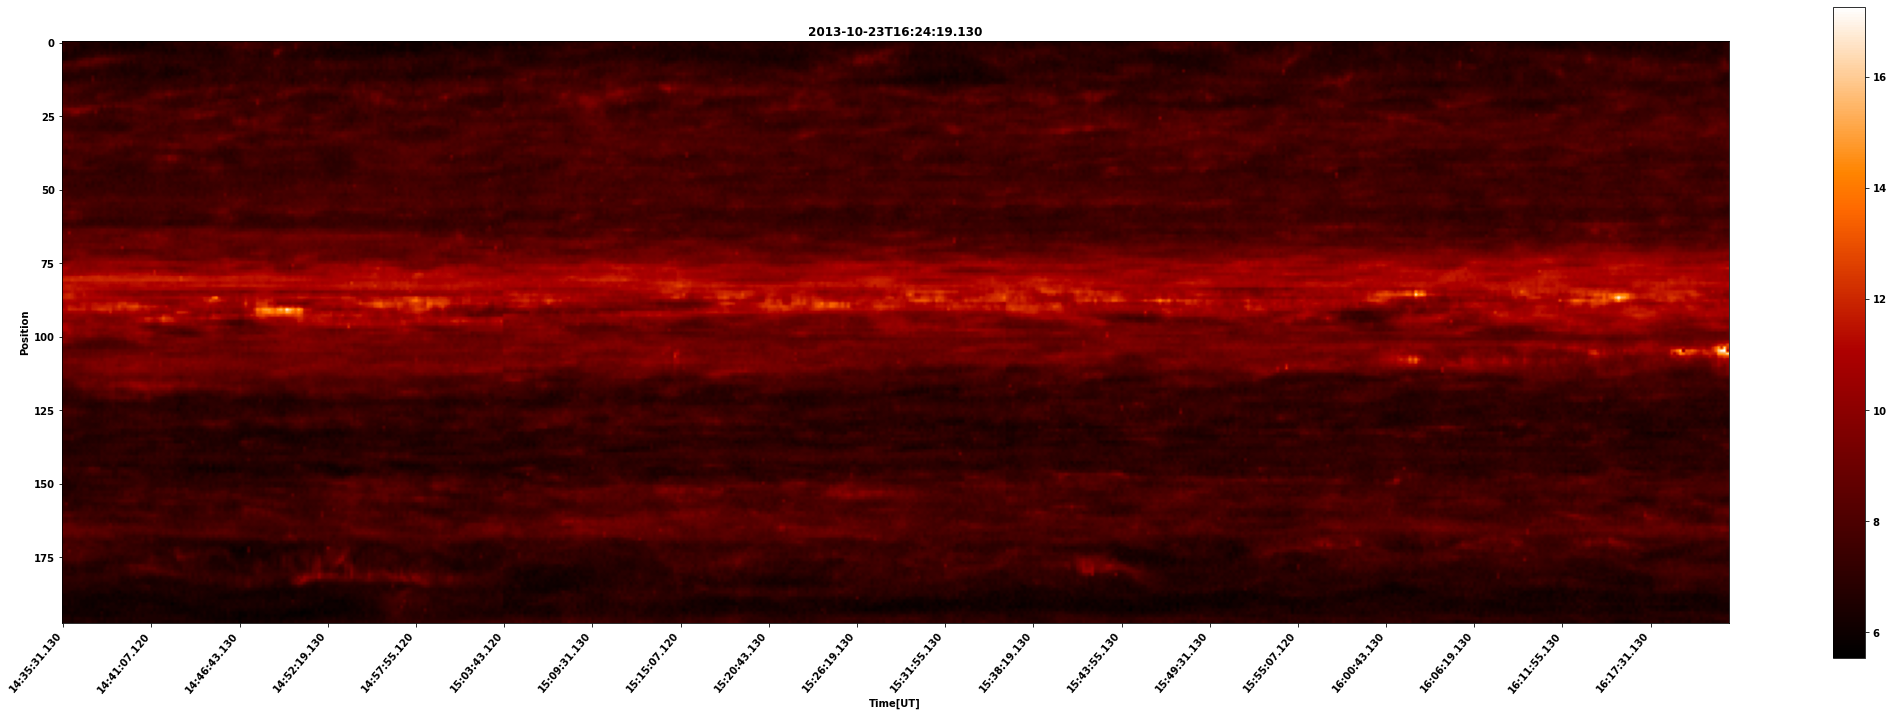

In [13]:
import math
folder = '/Users/delbe/OneDrive - FHNW/aia_304/20131023_142944_3823251483'
files = glob.glob(folder + '/*')


x1, y1, x2, y2 = 1956, 2070, 1957, 1873  

gradient = (y2-y1)/(x2-x1)
origin = y1 - gradient * x1


y = np.arange(min(y1, y2),max(y1, y2)+1)
x = (y - origin) / gradient

coords = (np.column_stack((x.round().astype(int),y.astype(int))))

aia0_map = sunpy.map.Map(files[0])
aiaN_map = sunpy.map.Map(files[-1])

aia0_date = aia0_map.date
aiaN_date = aiaN_map.date

pt = aiapy.calibrate.util.get_pointing_table(aia0_date - 12*u.h, aiaN_date + 12*u.h)                           

aia_updated_pointing_0 = aiapy.calibrate.update_pointing(aia0_map, pointing_table=pt)
aia_0 = aiaprep(aia_updated_pointing_0)

skycoords = aia0_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)


final_image = []
list_dates = []

for i in range(0,len(files)-1):
# for i in range(0,60):

    if i%10 == 0:
        print(i, end=',')

    try:         
        aia_i_map = sunpy.map.Map(files[i])

    except: 
        continue

    aia_updated_pointing_i = aiapy.calibrate.update_pointing(aia_i_map, pointing_table=pt)

    aia_i = aiaprep(aia_updated_pointing_i)

    skycoords_i = solar_rotate_coordinate(skycoords, time=(aia_i.date - aia_0.date).to(u.s))
    pxcoords_i = aia_i_map.world_to_pixel(skycoords_i) # aia_i => aia_map0

    spilltet_date = aia_i.date.isot.split("T")
    list_dates.append(spilltet_date[1]) 
    
    coords_x = pxcoords_i.x.value
    coords_y = pxcoords_i.y.value.round().astype('int')
    
    x_floor_coords = [coords_y, np.floor(coords_x).astype(int)] 
    x_ceil_coords = [coords_y, np.ceil(coords_x).astype(int)] 
    x_mod = coords_x % 1

    zi1 = np.flipud(aia_i.data**0.4)[tuple(x_floor_coords)]
    zi2 = np.flipud(aia_i.data**0.4)[tuple(x_ceil_coords)]
    
    zi = zi1 * (1 - x_mod) + zi2 * x_mod
    
    if len(final_image) == 0: 
        final_image = zi 
    else:
        final_image = np.vstack([final_image, zi])

# print(zi.round(decimals=1))
fig, ax = plt.subplots(figsize=[30,10])      

plt.title(aia_i.date.isot)

# # defining and sitting the number of ticks:
nticks = 20 
ax.xaxis.set_major_locator(MaxNLocator(nticks))
ax.set_xticklabels(list_dates[::int(len(list_dates)/nticks)], rotation = 50, horizontalalignment="right")

im = plt.imshow(final_image.transpose(),cmap = aia_i.cmap)
plt.colorbar()

plt.xlabel('Time[UT]')
plt.ylabel('Position')
plt.show()
    

In [ ]:
# plt.rcParams.update({'figure.autolayout': True})

# from matplotlib.ticker import MaxNLocator


# folder = '/Users/delbe/OneDrive - FHNW/aia_304/20131023_142944_3823251483'
# files = glob.glob(folder + '/*')


# x1, y1, x2, y2 = 1956, 2070, 1957, 1873  

# gradient = (y2-y1)/(x2-x1)
# origin = y1 - gradient * x1


# y = np.arange(min(y1, y2),max(y1, y2)+1)
# x = (y - origin) / gradient

# coords = (np.column_stack((x.round().astype(int),y.astype(int))))

# aia0_map = sunpy.map.Map(files[0])
# aiaN_map = sunpy.map.Map(files[-1])

# aia0_date = aia0_map.date
# aiaN_date = aiaN_map.date

# pt = aiapy.calibrate.util.get_pointing_table(aia0_date - 12*u.h, aiaN_date + 12*u.h)                           
# # aia_1 = sunpy.map.Map(files[0])

# skycoords = aia0_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)
# skycoords_i = solar_rotate_coordinate(skycoords, time=(3000*u.s))

In [ ]:
a= 2
b = 3

print(a%b)

if a%b != 0:
    print(int(a//b + 1))
else:
    print(int(a/b))

In [ ]:
import math
folder = '/Users/delbe/OneDrive - FHNW/aia_304/20131023_142944_3823251483'
files = glob.glob(folder + '/*')


x1, y1, x2, y2 = 1956, 2070, 1957, 1873  

gradient = (y2-y1)/(x2-x1)
origin = y1 - gradient * x1


y = np.arange(min(y1, y2),max(y1, y2)+1)
x = (y - origin) / gradient

coords = (np.column_stack((x.round().astype(int),y.astype(int))))

aia0_map = sunpy.map.Map(files[0])
aiaN_map = sunpy.map.Map(files[-1])

aia0_date = aia0_map.date
aiaN_date = aiaN_map.date

pt = aiapy.calibrate.util.get_pointing_table(aia0_date - 12*u.h, aiaN_date + 12*u.h)                           

aia_updated_pointing_0 = aiapy.calibrate.update_pointing(aia0_map, pointing_table=pt)
aia_0 = aiaprep(aia_updated_pointing_0)

skycoords = aia0_map.pixel_to_world(coords[:,0] * u.pix, coords[:,1] * u.pix)


final_image = []
list_dates = []

for i in range(0,len(files)-1):
# for i in range(0,60):

    if i%10 == 0:
        print(i, end=',')

    try:         
        aia_i_map = sunpy.map.Map(files[i])

    except: 
        continue

    aia_updated_pointing_i = aiapy.calibrate.update_pointing(aia_i_map, pointing_table=pt)

    aia_i = aiaprep(aia_updated_pointing_i)

    skycoords_i = solar_rotate_coordinate(skycoords, time=(aia_i.date - aia_0.date).to(u.s))
    # print((aia_i.date - aia_0.date).to(u.s))
    #pxcoords_i = aia_0.world_to_pixel(skycoords_i)
    pxcoords_i = aia_i_map.world_to_pixel(skycoords_i) # aia_i => aia_map0
    
    # coords_i = [pxcoords_i.y.value.round().astype('int'), pxcoords_i.x.value.round().astype('int')]
    
    
    coords_x = pxcoords_i.x.value
    coords_y = pxcoords_i.y.value.round().astype('int')
    

    spilltet_date = aia_i.date.isot.split("T")
    list_dates.append(spilltet_date[1]) 
    
    x_floor_coords = [coords_y, np.floor(coords_x).astype(int)] # .astype(int)
    x_ceil_coords = [coords_y, np.ceil(coords_x).astype(int)] # .astype(int)
    x_mod = coords_x % 1
    
    # print(int(aia_i.data))
    data = np.flipud(aia_i.data**0.4)
    zi1 = data[tuple(x_floor_coords)]
    zi2 = data[tuple(x_ceil_coords)]
    
    zi = zi1 * (1 - x_mod) + zi2 * x_mod
    # print(zi)
    
    
    
    if len(final_image) == 0: 
        final_image = zi 
    else:
        final_image = np.vstack([final_image, zi])

# print(zi.round(decimals=1))
fig, ax = plt.subplots(figsize=[30,10])      

plt.title(aia_i.date.isot)

# # defining and sitting the number of ticks:
nticks = 20 
ax.xaxis.set_major_locator(MaxNLocator(nticks))
ax.set_xticklabels(list_dates[::int(len(list_dates)/nticks)], rotation = 50, horizontalalignment="right")

im = plt.imshow(final_image.transpose(),cmap = aia_i.cmap)
plt.colorbar()

plt.xlabel('Time[UT]')
plt.ylabel('Position')
plt.show()